In [1]:
from meta_opt.utils.experiment_utils import make, process_results, bcolors, plot, get_final_cparams

import os
import matplotlib.pyplot as plt
from IPython.display import HTML
import itertools
import dill as pkl

# Load

In [28]:
# configuration
CFG = {
    # training options are None because we arent training :)
    'workload': None,
    'num_iters': None,
    'eval_every': None,
    'num_eval_iters': None,
    'batch_size': None,
    'full_batch': True,
    'reset_every': None,

    # experiment options
    'experiment_name': 'wmt_miniscule_cf',
    'load_checkpoint': True,
    'overwrite': False,  # whether to allow us to overwrite existing checkpoints or throw errors
    'directory': os.path.abspath("../"),
}
results = make(CFG)  # save to temp var `_results` so that we dont immediately overwrite `results` in case somethings wrong
processed_results = process_results(CFG, results)
# processed_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], CFG['experiment_name']), 'rb'))

using cpu for jax
results will be stored at: /Users/evandigiorno/Desktop/meta-opt/data/wmt_miniscule_cf_*.pkl
we will try to load experiment checkpoint first
	loaded checkpoint from /Users/evandigiorno/Desktop/meta-opt/data/wmt_miniscule_cf_raw.pkl, containing ['cf_adam']
note: using full_batch means we will never eval
cannot save processed results with existing processed results and `overwrite=False`


In [19]:
# from meta_opt.utils.experiment_utils import save_checkpoint
# ret = {}
# for k in results[0].keys():
#     ret[k] = [r[k][0] for r in results]
#     for i in range(len(results)):
#         ret[k][i]['args']['experiment_name'] = 'cifar_wd'
# save_checkpoint(CFG, ret)

In [22]:
baseline_results = pkl.load(open('{}/data/{}_processed.pkl'.format(CFG['directory'], 'wmt small models/wmt_miniscule'), 'rb'))
r = {}
for k in baseline_results.keys(): 
    r[k] = baseline_results[k]
    for _k, _v in processed_results[k].items():
        r[k][_k] = _v
processed_results = r

# Plot
Plot and also animate the values taken by the $\{M_h\}_{h=1}^H$ coefficients during training. Each $M_h$ multiplies a disturbance from $h$ training steps ago (i.e. 0 is most recent in this plot).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


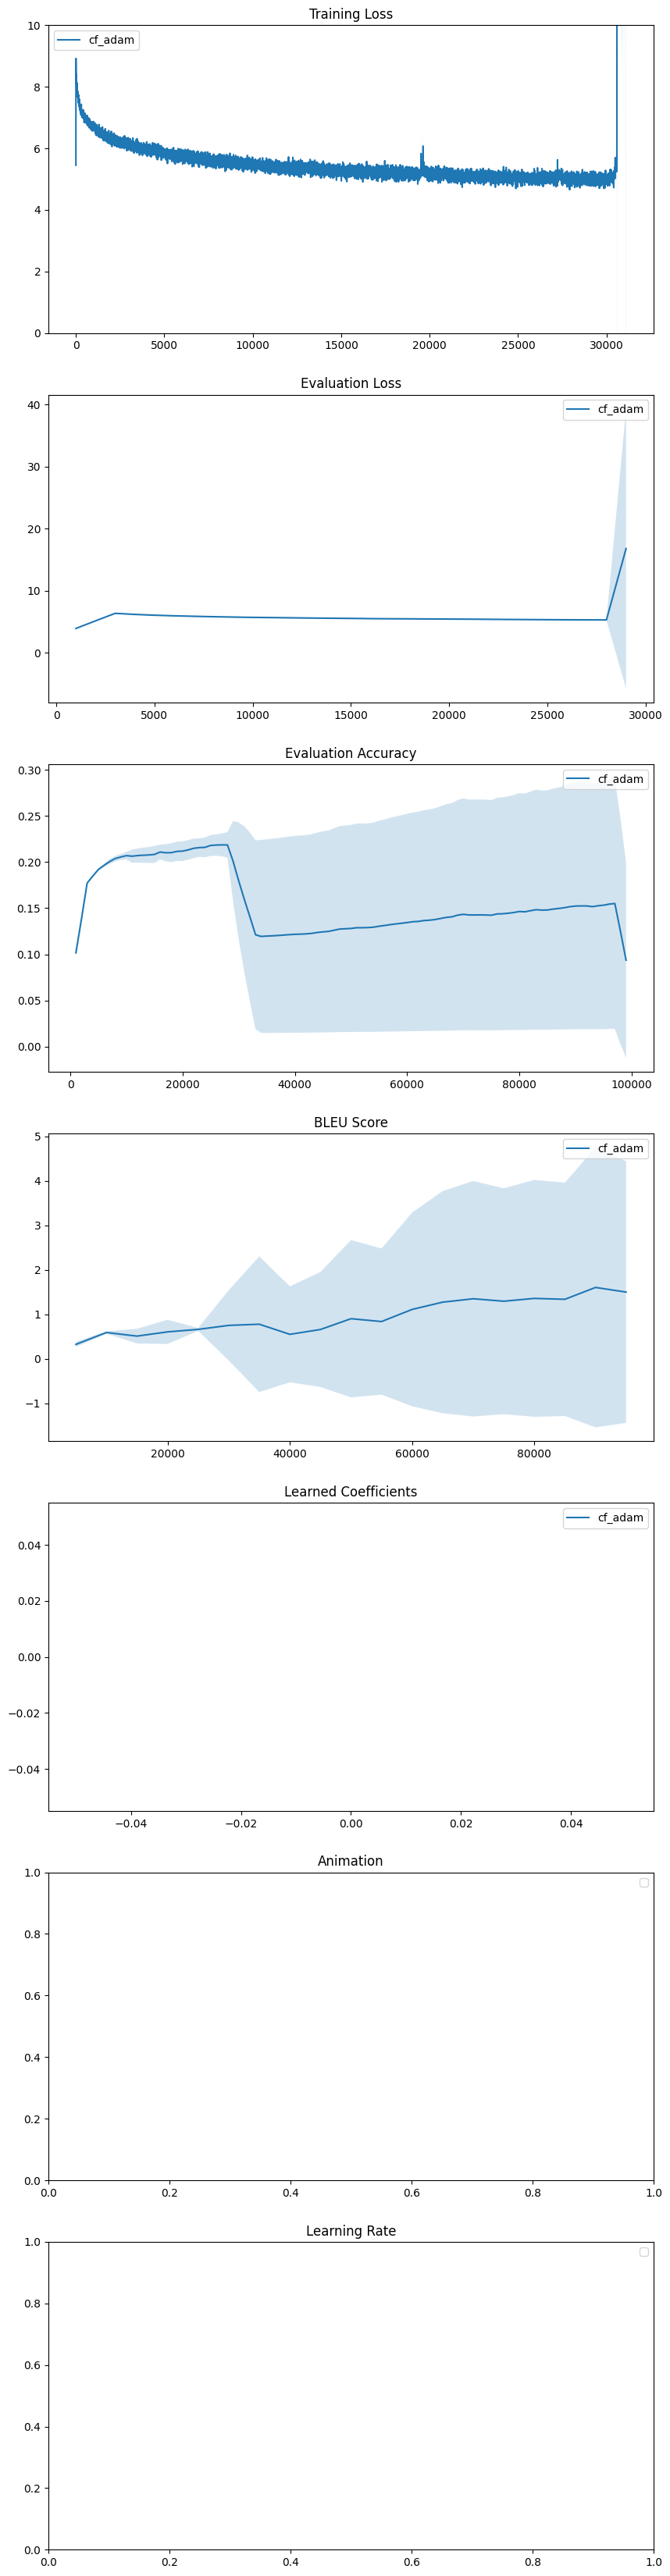

In [29]:
# ----------------------------------------
# plot a particular set of experiments
# ----------------------------------------
keys_to_plot = {
    'sgd': 'sgd',
    'momentum': 'momentum',
    'adamw': 'adamw',
    'dadamw': 'd-adap',
    'mechadamw': 'mechanic',
    # 'rmsprop',
    'hgd': 'hgd',
    'cf': 'ours (finetuned)',
    # 'ncf': 'ours (finetuned)',
    'frozen': 'ours (frozen)',
}

plots_to_make = {
              'loss': 'Training Loss',
              'eval_loss': 'Evaluation Loss',
              'eval_acc': 'Evaluation Accuracy',
              'bleu': 'BLEU Score',
              'M': 'Learned Coefficients',
              'anim': 'Animation',
              # 'grad_sq_norm': 'Sq Grad Norm',
              # 'proj_grad_sq_norm': 'Proj Sq Grad Norm',
               'lr': 'Learning Rate',
}

# ----------------------------------------
# OR just plot em via regex
# ----------------------------------------
# keys_to_plot = '.*long.*'  # specific regex
keys_to_plot = '.*'  # anything

(fig, ax), anim = plot(results, processed_results, keys_to_plot, plots_to_make, anim_bounds=(-1.5, 0.5), smoothing=5)
ax[0].set_ylim(0.,10)
# ax[0].set_xlim(680, 800)
# ax[1].set_ylim(0.6, 0.95)
# ax[2].set_ylim(0.95, 0.99)
# ax[3].set_ylim(0.95, 0.99)
# ax[4].set_ylim(-0.1, 40)
# ax[1].set_ylim(0, 0.01)
# plt.savefig('{}/figs/{}.pdf'.format(CFG['directory'], CFG['experiment_name']))
plt.show()

if anim is not None:
    h = HTML(anim.to_html5_video())
    display(h)